In [13]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt

In [17]:
x = sy.symbols('x')
fx = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
dfdx = sy.diff((sy.sin(x) + 1) ** sy.sin(sy.cos(x)), x)
dfdx

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

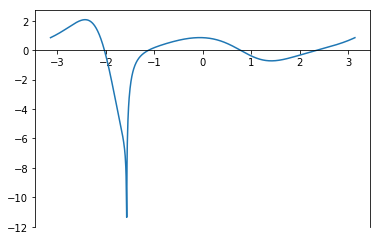

In [16]:
f_prime_x = sy.lambdify(x, dfdx, 'numpy')
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
xx = np.linspace(-np.pi, np.pi, num = 1000)
yy = f_prime_x(xx)
plt.plot(xx, yy)

In [44]:
def forward_1(f, x, h):
    return (f(x + h) - f(x)) / h

def forward_2(f, x, h):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)

def backward_1(f, x, h):
    return (f(x) - f(x - h)) / h

def backward_2(f, x, h):
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)

def centered_2(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def centered_4(f, x, h):
    return (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)

<IPython.core.display.Javascript object>


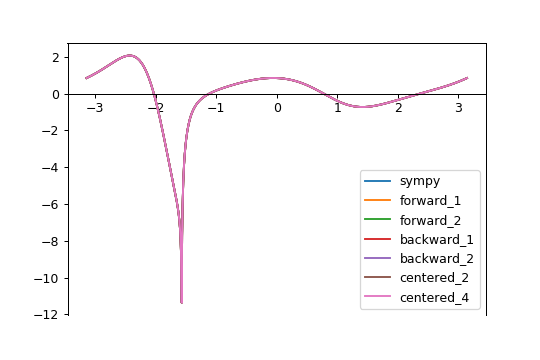

In [56]:
%matplotlib notebook
h = 1e-6

f_prime_x = sy.lambdify(x, dfdx, 'numpy')
f = sy.lambdify(x, fx, 'numpy')
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
xx = np.linspace(-np.pi, np.pi, num = 1000)
yy1 = f_prime_x(xx)
yy2 = forward_1(f, xx, h)
yy3 = forward_2(f, xx, h)
yy4 = backward_1(f, xx, h)
yy5 = backward_2(f, xx, h)
yy6 = centered_2(f, xx, h)
yy7 = centered_4(f, xx, h)
plt.plot(xx, yy1, label = 'sympy')
plt.plot(xx, yy2, label = 'forward_1')
plt.plot(xx, yy3, label = 'forward_2')
plt.plot(xx, yy4, label = 'backward_1')
plt.plot(xx, yy5, label = 'backward_2')
plt.plot(xx, yy6, label = 'centered_2')
plt.plot(xx, yy7, label = 'centered_4')
plt.legend(loc='lower right')

#We change h, the difference between sympy and the rest may be significant.
#With h = 1e-6, the differnce is very different to tell (may be observed if zoom in a lot).